# Deep Learning using PyTorch

In [1]:
!pip install -q torchvision

In [2]:
# Imports 
import time 
import torch 
import torchvision 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
from torchvision import datasets, transforms 
import matplotlib.pyplot as plt 
import matplotlib 
import numpy as np 

In [11]:
# Packages versions 
%reload_ext watermark
%watermark -a "Data Snow" --iversions

json        2.0.9
torchvision 0.6.1
torch       1.5.1
numpy       1.18.1
autopep8    1.4.4
matplotlib  3.1.3
Data Snow


In [12]:
# Function to transform data when loaded
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

In [13]:
# Loading trainning dataset
dados_treino = torch.utils.data.DataLoader(datasets.MNIST('dados',
                                                         train=True,
                                                         download = True,
                                                         transform = transform),
                                          batch_size=64,
                                          shuffle=True)

Extracting dados/MNIST/raw/train-images-idx3-ubyte.gz to dados/MNIST/raw


Extracting dados/MNIST/raw/train-labels-idx1-ubyte.gz to dados/MNIST/raw


Extracting dados/MNIST/raw/t10k-images-idx3-ubyte.gz to dados/MNIST/raw


Extracting dados/MNIST/raw/t10k-labels-idx1-ubyte.gz to dados/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [14]:
# Loading Testing Dataset
dados_test = torch.utils.data.DataLoader(datasets.MNIST('dados',
                                                         train=True,
                                                         transform = transform),
                                          batch_size=64,
                                          shuffle=True)

In [18]:
# Visualizing dimesions in trainning dataset
dataiter = iter(dados_treino)
images, labels = dataiter.next()

print(images.shape) # batch size-quantity of registers per batch, quantity of batch, 28px, 28px
print(labels.shape) # quantity of labels

print(images[0], labels[0])

torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
   

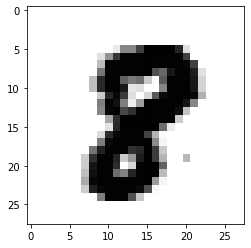

In [22]:
# Visualizing an image
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

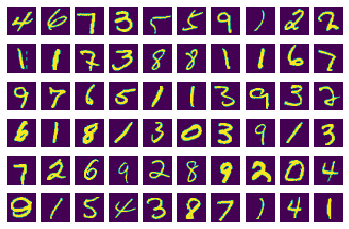

In [26]:
# Plotting many images
figure = plt.figure()
num_of_images = 60 
for index in range(1,num_of_images + 1):
    plt.subplot(6,10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze())

In [27]:
# Hiperparâmetros da rede
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

In [28]:
# Modelo
modelo_pt = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),  # 784 x 128
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # 128 x 64
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[1], output_size),  # 64 x 10
                          nn.LogSoftmax(dim = 1))

In [29]:
print(modelo_pt)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [30]:
# Função de custo do modelo
criterion = nn.NLLLoss()

# Obtendo os lotes de dados
images, labels = next(iter(dados_treino))

# Ajustando o shape
images = images.view(images.shape[0], -1)

# Logs das probabilidades de classe
logps = modelo_pt(images) 

# Perda
loss = criterion(logps, labels) 

In [31]:
print('\nAntes do Backward Pass: \n', modelo_pt[0].weight.grad)
loss.backward()
print('\nDepois do Backward Pass: \n', modelo_pt[0].weight.grad)


Antes do Backward Pass: 
 None

Depois do Backward Pass: 
 tensor([[-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0048,  0.0048,  0.0048,  ...,  0.0048,  0.0048,  0.0048],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        ...,
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [32]:
# Otimizador
optimizer = optim.SGD(modelo_pt.parameters(), lr = 0.003, momentum = 0.9)

# Número de épocas
epochs = 10

# Loop de treinamento
for e in range(epochs):
    
    # Registra o momento de início da época
    start_time = time.time()
    
    # Zera o erro da época
    running_loss = 0
    
    # Loop pelas imagens e labels
    for images, labels in dados_treino:
        
        # Flatten das imagens MNIST
        images = images.view(images.shape[0], -1)
    
        # Passada de treinamento
        optimizer.zero_grad()
        
        output = modelo_pt(images)
        loss = criterion(output, labels)
        
        # Aqui acontece o aprendizado como backpropagation
        loss.backward()
        
        # E aqui otimiza os pesos
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print('Epoch: {0}, Tempo Gasto: {1:.2f}s, Loss(Erro): {2}'.format(e, 
                                                                          time.time() - start_time, 
                                                                          running_loss / len(dados_treino)))

Epoch: 0, Tempo Gasto: 16.44s, Loss(Erro): 0.650017506309918
Epoch: 1, Tempo Gasto: 17.69s, Loss(Erro): 0.27901103558030715
Epoch: 2, Tempo Gasto: 16.92s, Loss(Erro): 0.21483662489777816
Epoch: 3, Tempo Gasto: 17.58s, Loss(Erro): 0.17257661835701543
Epoch: 4, Tempo Gasto: 18.04s, Loss(Erro): 0.14743969052620948
Epoch: 5, Tempo Gasto: 15.84s, Loss(Erro): 0.12640684528617877
Epoch: 6, Tempo Gasto: 14.65s, Loss(Erro): 0.11243571125681816
Epoch: 7, Tempo Gasto: 15.31s, Loss(Erro): 0.09826640830512272
Epoch: 8, Tempo Gasto: 14.78s, Loss(Erro): 0.0887896969908479
Epoch: 9, Tempo Gasto: 14.60s, Loss(Erro): 0.07970729375333548
